In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

from scipy.constants import e, k, epsilon_0
import numpy as np
import matplotlib.pyplot as plt

# my own modules
from src.solver import Schrodinger_solver1D as solver1D
from src.model import potential 

# Single Quantum Well

In [2]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[-2, 2], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

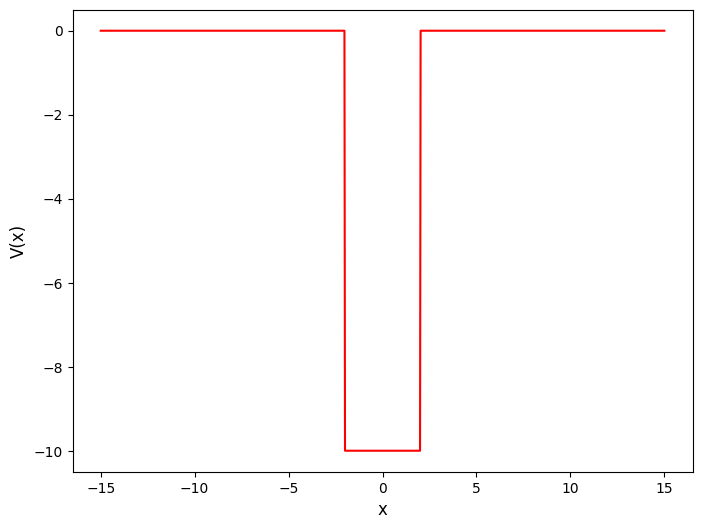

In [3]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

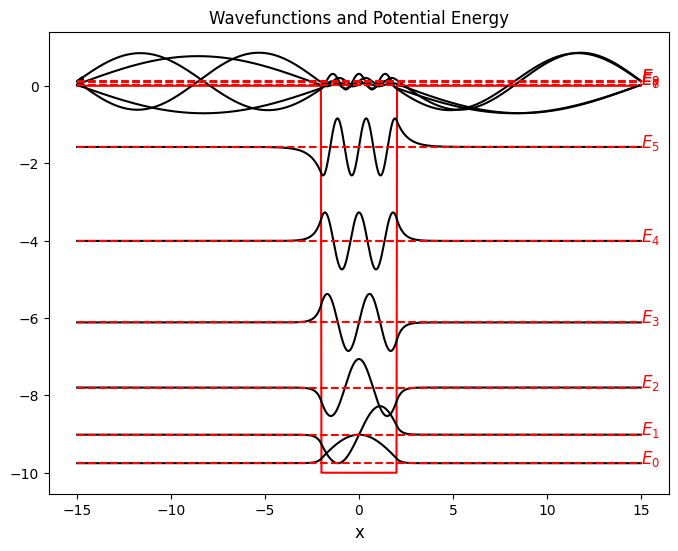

In [4]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=E[1] - E[0])
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

Interestingly, when it is an even quantum number, the wavefunction is symmetric but when it is an odd number, the wavefunctions would become anti-symmetric. <br>

Theoretically, when E is larger than the well height, the energy should not be quantized. However, in the simulation, we set the wave functions at the boundary is always zero. This would be like another infinite well out of the simulation boundary. Therefore, a energy quantized would be observed in this cases. Besides, the grid size would also influence but in this case the dominant term is the boundary conditions.


# Two Quantum Wells

In [5]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-6, -2], [2,6] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

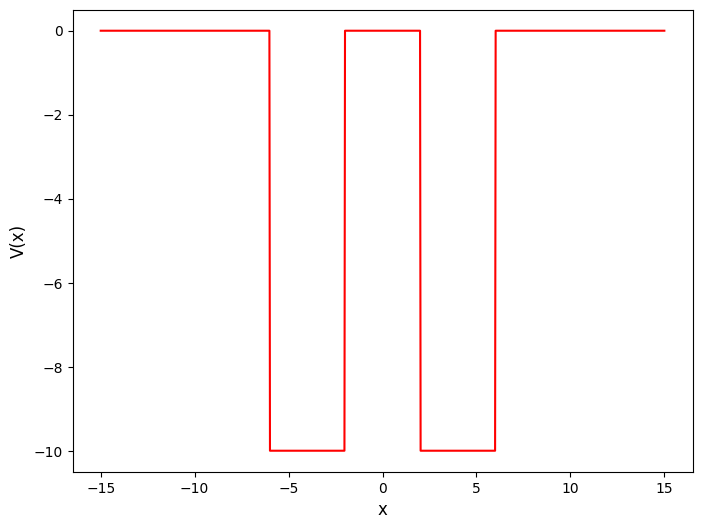

In [6]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

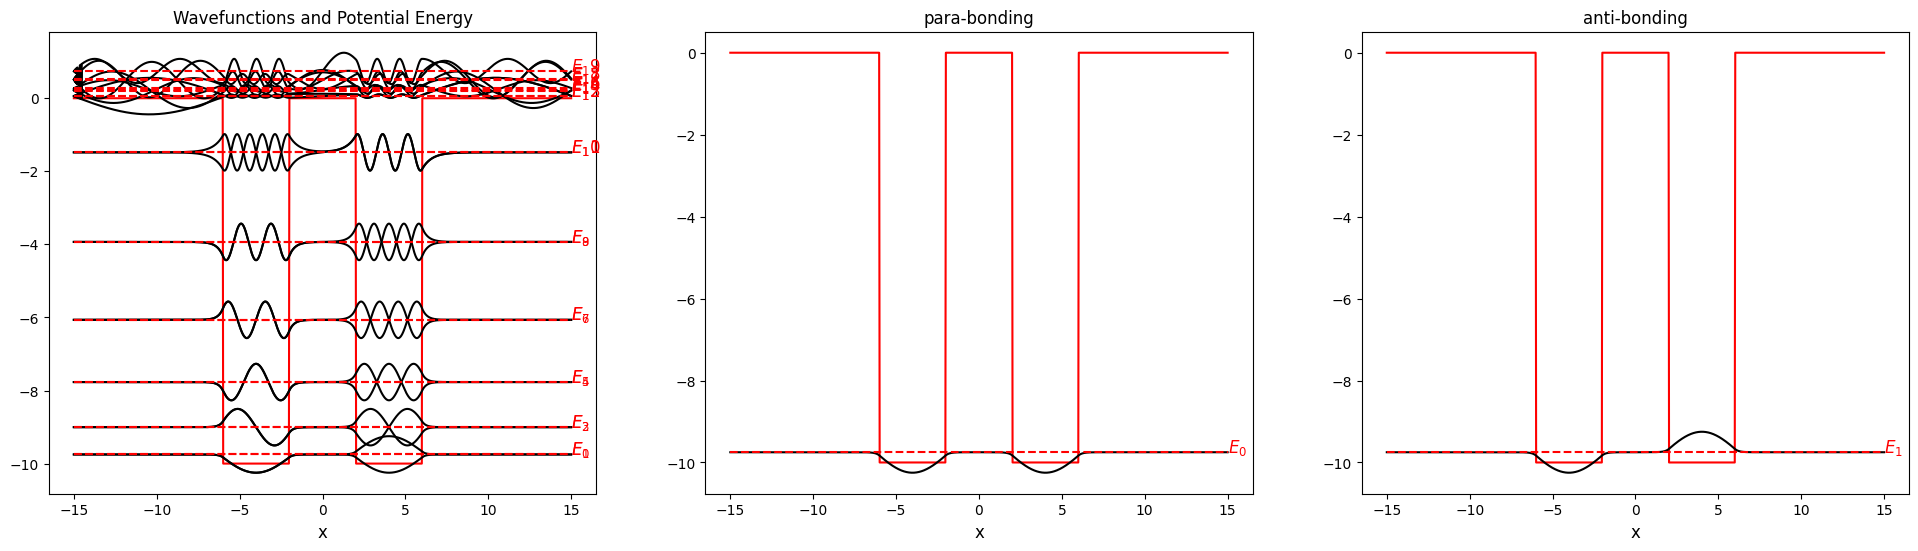

In [7]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = 'para-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = 'anti-bonding')

Because of the highly symmetric of potential energy, there would be two degenerate states of each energy level, including para-bonding and anti-bonding cases.

# Two Quantum Wells / Unbalanced

In [8]:
""" setting """
m = 1
V0 = 0
V1 = -10
V2 = -8
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range = [-6, -2], V0=V0, V1 = V1) + potential.finite_wells_potential(x=x, x_range = [2, 6], V0=V0, V1 = V2)

<Axes: xlabel='x', ylabel='V(x)'>

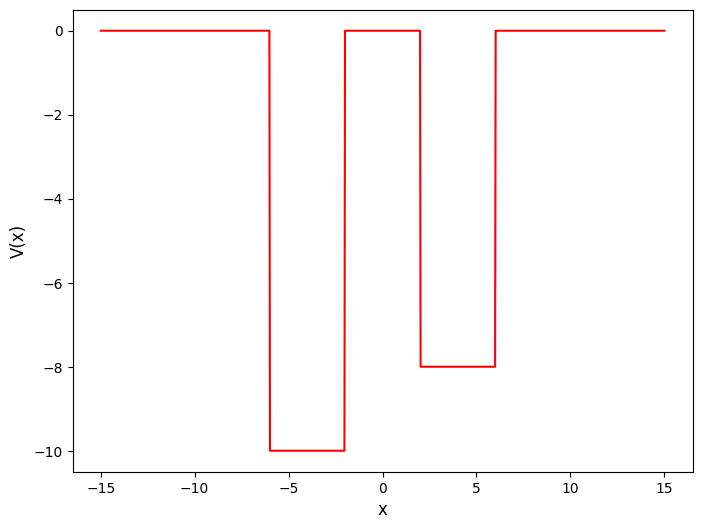

In [9]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

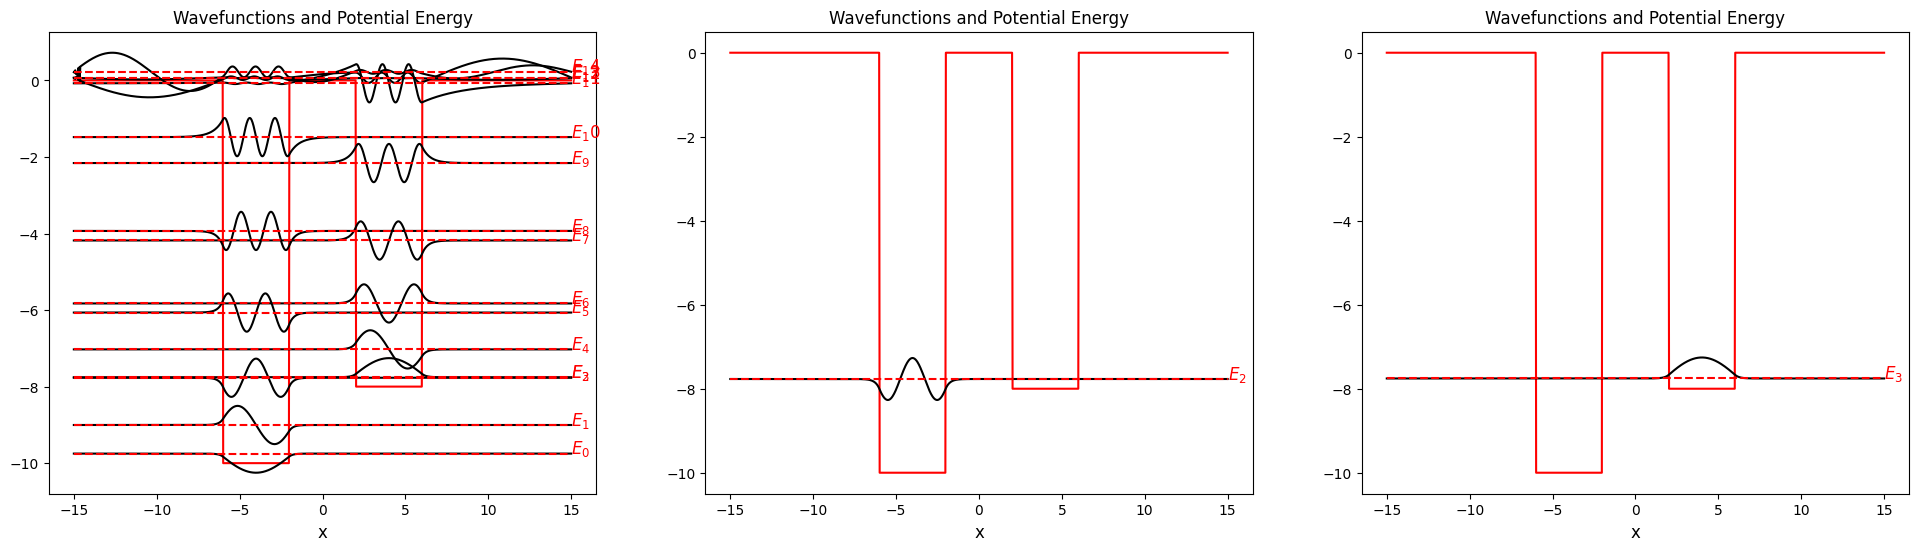

In [10]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1])
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2])

The unsymmetric potential energy would break down the degenerate states. However, $E_2$ and $E_3$ are still degenerate. The user can change the height and the width of one quantum well. Then, the user could find that this degerate states will also be broken.

# Triple Quantum Wells 

In [11]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-10, -6], [-2,2], [6,10] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

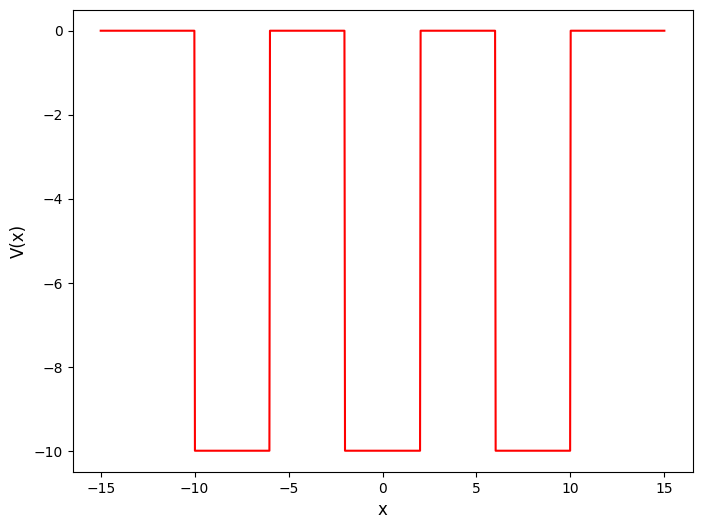

In [12]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'state 2 - para-bonding'}, xlabel='x'>

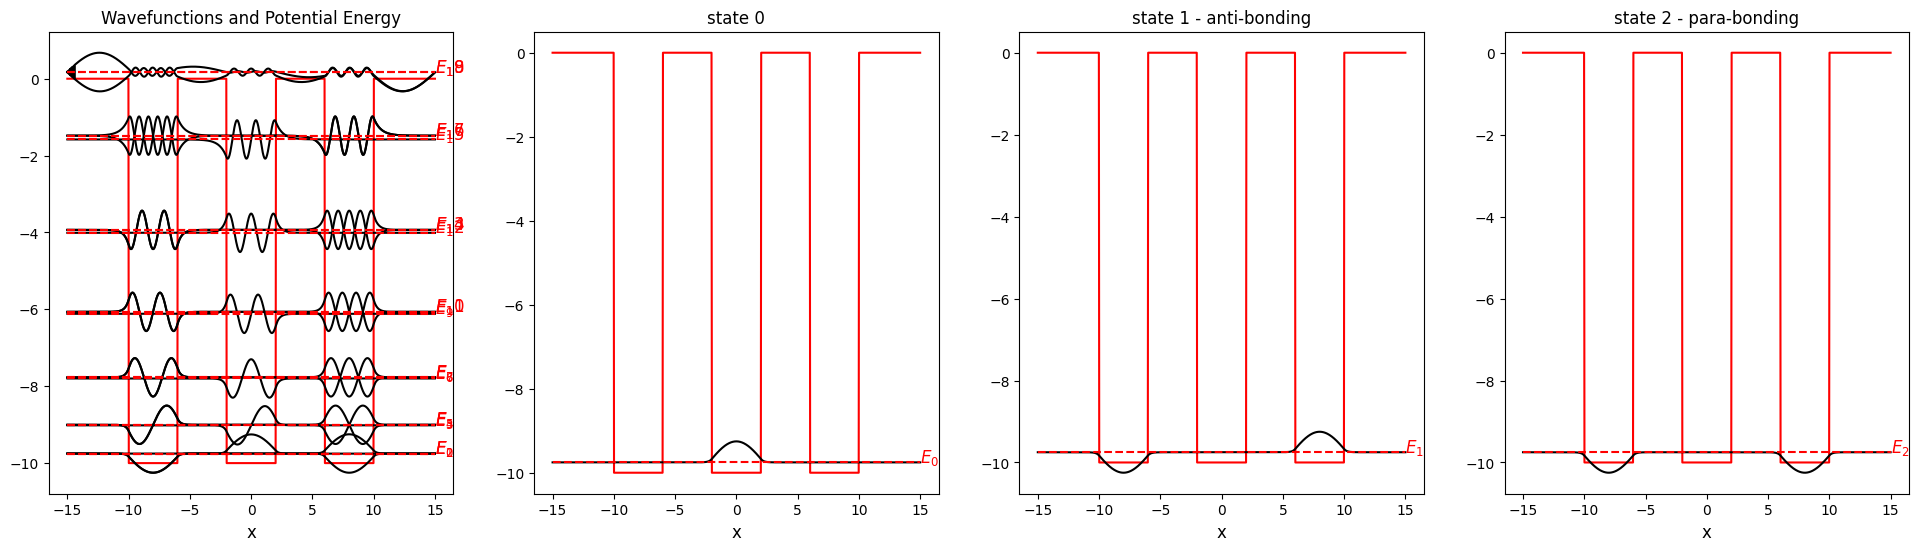

In [13]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 4, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = 'state 0')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = 'state 1 - anti-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[3], title = 'state 2 - para-bonding')

# Single Triangle Well

In [14]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range=[-3, 3], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

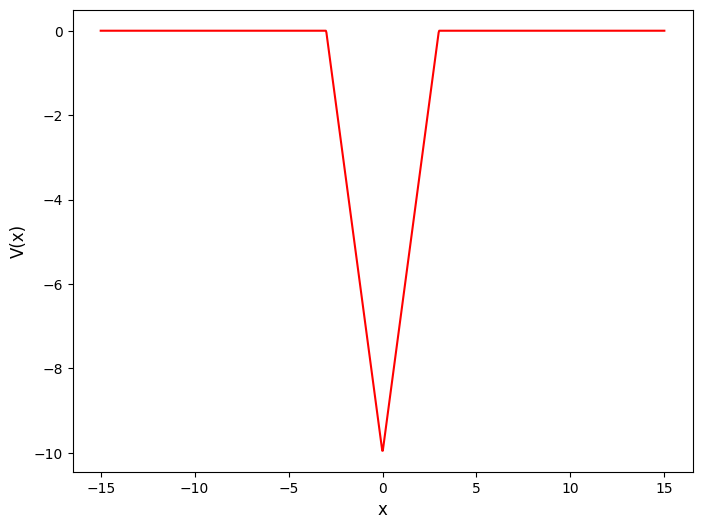

In [15]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

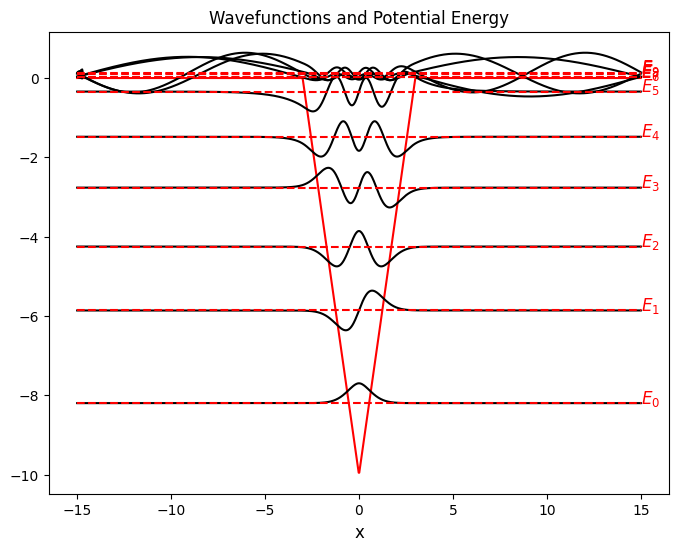

In [16]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

# Two Triangle Wells

In [17]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-9, -3], [3, 9]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

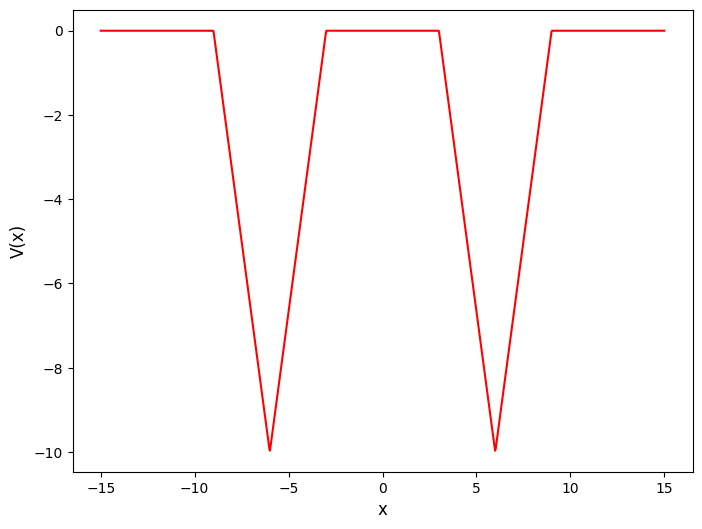

In [18]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

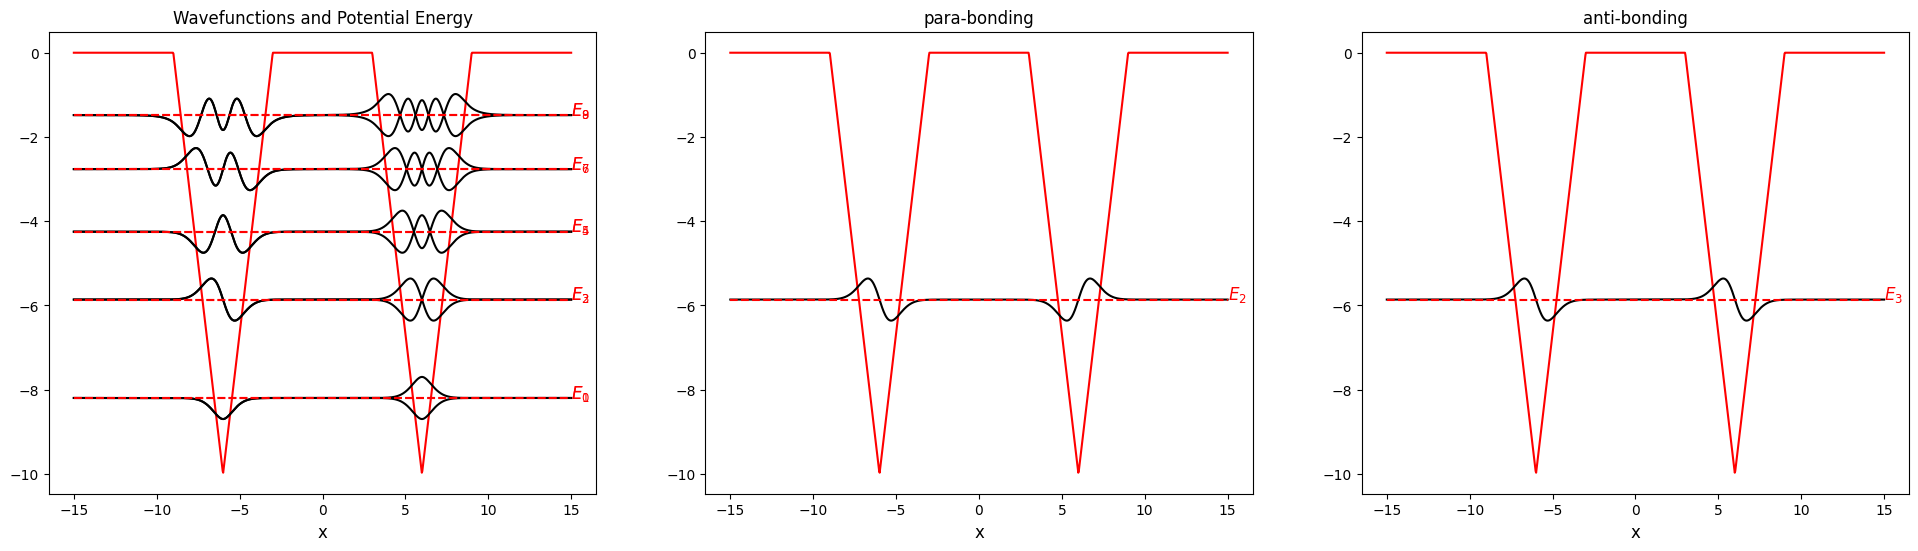

In [19]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'para-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

# Two Triangle Wells / Side by side

In [20]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-6, 0], [0, 6]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

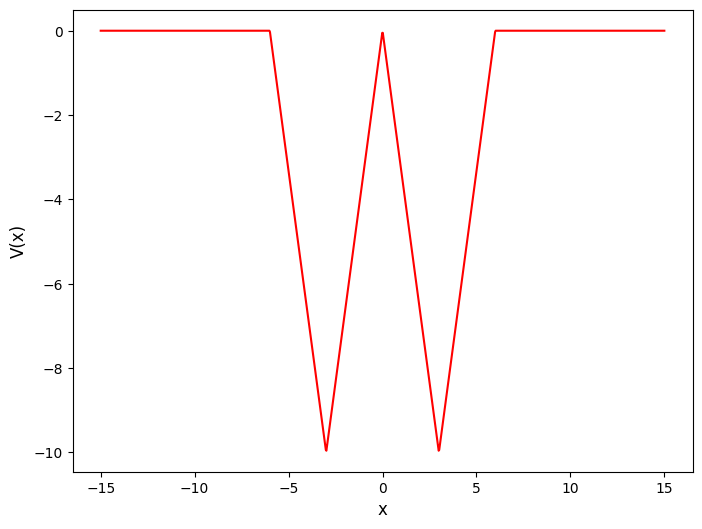

In [21]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

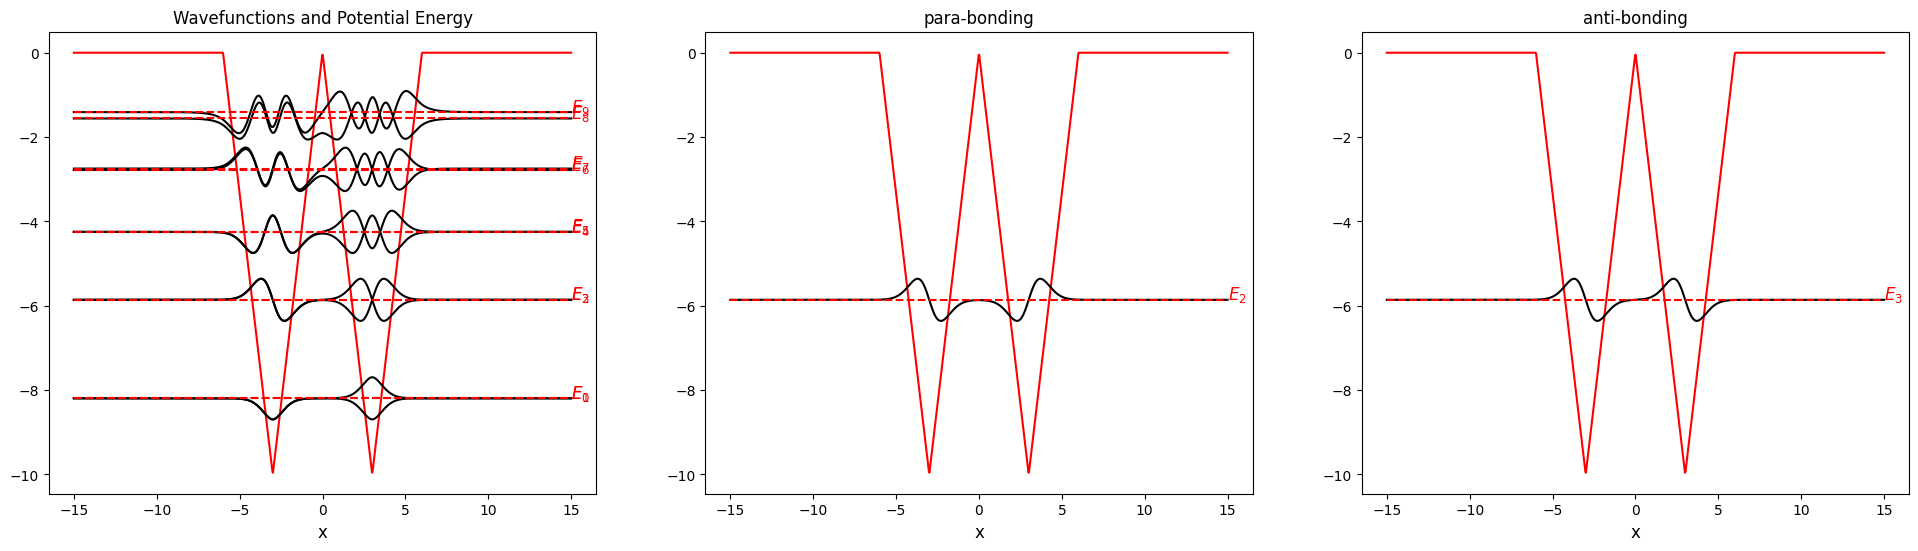

In [22]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'para-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

# Two Triangle Wells / Coupled

In [23]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-5, 1], [-1, 5]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

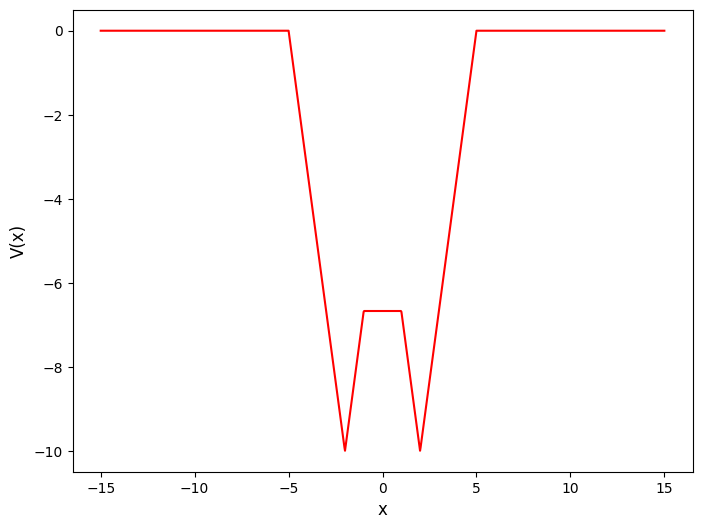

In [24]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

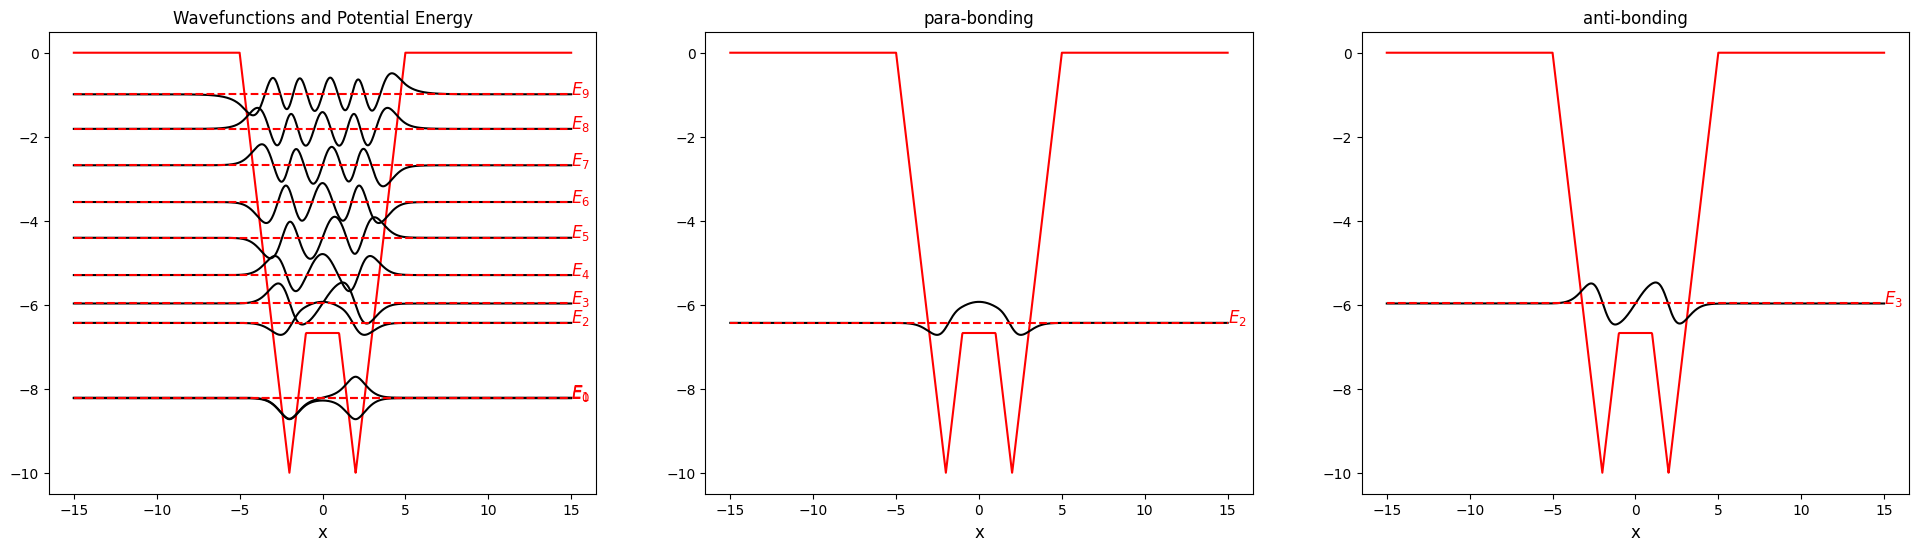

In [25]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'para-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

In previous two cases, state 2 and 3 are degenerate. However, as two triangle quantum become closer, two wavefunction start interfere with each other, which would cause energy difference between para- and anti- bonding. Becuase the derivative (momentum) of para-bonding is less than the previous cases, the total energy would also become less the previous E2. In constrast, E3 are roughly the same as previous cases.